In [4]:
import pandas as pd
import zipfile as zp
# from ydata_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Zip file path
zip_path = "../data/01_raw/Cell2Cell.zip"

In [6]:
# Extracting files from zip file
with zp.ZipFile(zip_path) as z:
    print(z.namelist())
    with z.open("cell2celltrain.csv") as f:
        df_train = pd.read_csv(f)
    with z.open("cell2cellholdout.csv") as l:
        df_test = pd.read_csv(l)

['cell2cellholdout.csv', 'cell2celltrain.csv']


# Training Set

In [7]:
# First five rows
df_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [8]:
# Last 5 rows
df_train.tail()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No
51046,3399994,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,No,1,60,Yes,5-Low,Other,Other,Unknown


In [9]:
# Checking datatypes of each features
df_train.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [10]:
# Checking Null values
df_train.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [11]:
# dataset size and shape
df_train.shape

(51047, 58)

In [12]:
# Checking data info column names and dtypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [13]:
# Checking the duplicated rows
df_train.duplicated().sum()

np.int64(0)

# Testing Set

In [14]:
df_test.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [15]:
df_test.tail()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
19995,3399938,NaN,85.15,815.0,88.0,0.0,1.0,0.4,0.0,0.0,...,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,No,0,150,No,3-Good,Other,Other,Unknown
19999,3399986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,3,Unknown,No,4-Medium,Suburban,Professional,Yes


In [16]:
df_test.dtypes

CustomerID                     int64
Churn                        float64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [18]:
df_test.isnull().sum()

CustomerID                       0
Churn                        20000
MonthlyRevenue                  60
MonthlyMinutes                  60
TotalRecurringCharge            60
DirectorAssistedCalls           60
OverageMinutes                  60
RoamingCalls                    60
PercChangeMinutes              135
PercChangeRevenues             135
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                      4
Handsets                         0
HandsetModels       

In [19]:
df_test.duplicated().sum()

np.int64(0)

In [20]:
df_test.shape

(20000, 58)

# Analysis 

In [21]:
print(df_train.columns.tolist())

['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam', 'C

In [22]:
cat_cols = df_train.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    print(f"Value counts for column: {col}")
    print(df_train[col].value_counts(dropna=False))
    print("-" * 50)

Value counts for column: Churn
Churn
No     36336
Yes    14711
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: ServiceArea
ServiceArea
NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
SFRRCM510       1
INHKOK765       1
NOLPOH504       1
ATLDBL478       1
NCRDNN910       1
Name: count, Length: 748, dtype: int64
--------------------------------------------------
Value counts for column: ChildrenInHH
ChildrenInHH
No     38679
Yes    12368
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: HandsetRefurbished
HandsetRefurbished
No     43956
Yes     7091
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: HandsetWebCapable
HandsetWebCapable
Yes    46046
No      5001
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: TruckOwner
Tru

In [23]:
col_to_cat = ['Churn','ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
        'NotNewCellphoneUser','OwnsMotorcycle','MadeCallToRetentionTeam','MaritalStatus','Occupation',
              'PrizmCode','CreditRating']
df_train[col_to_cat] = df_train[col_to_cat].astype('category')

In [24]:
print("Handset Price Missing Values: ", (df_train['HandsetPrice'] == 'Unknown').sum())
print("Marital Status Missing Values: ", (df_train['MaritalStatus'] == 'Unknown').sum())

Handset Price Missing Values:  28982
Marital Status Missing Values:  19700


In [25]:
df_train['MaritalStatus'] = df_train['MaritalStatus'].replace('Unknown', pd.NA)
print(df_train['MaritalStatus'].isna().sum())

19700


In [26]:
df_train['HandsetPrice'] = pd.to_numeric(df_train['HandsetPrice'], errors='coerce')
print(df_train['HandsetPrice'].isna().sum())

28982


In [27]:
null_cols = [col for col in df_train.columns if df_train[col].isna().any()]
null_cols

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'HandsetPrice',
 'MaritalStatus']

In [28]:
n = 0
for col in null_cols:
    print(f"{col}: {df_train[col].isna().sum()}")
    n+=1
print("Total number of missing columns: ",n)

MonthlyRevenue: 156
MonthlyMinutes: 156
TotalRecurringCharge: 156
DirectorAssistedCalls: 156
OverageMinutes: 156
RoamingCalls: 156
PercChangeMinutes: 367
PercChangeRevenues: 367
ServiceArea: 24
Handsets: 1
HandsetModels: 1
CurrentEquipmentDays: 1
AgeHH1: 909
AgeHH2: 909
HandsetPrice: 28982
MaritalStatus: 19700
Total number of missing columns:  16


In [29]:
pd.set_option('display.max_columns', None)
df_train[df_train.isna().any(axis=1)]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,NaN,No,3-Good,Town,Crafts,Yes
10,3000054,No,25.23,2.0,25.0,0.00,0.0,0.0,-2.0,-0.2,0.0,0.0,0.3,0.0,0.0,1.1,0.3,0.0,0.7,0.7,0.0,0.0,0.0,53,2,2,SANMCA210,2.0,2.0,354.0,0.0,0.0,No,No,Yes,Yes,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,7,No,0,30.0,No,1-Highest,Other,Other,NaN
12,3000062,No,42.56,270.0,37.0,0.25,6.0,0.0,202.0,-1.8,3.3,1.7,7.7,1.0,0.0,57.1,11.0,3.7,62.3,18.0,5.0,0.0,0.3,55,2,2,OKCOKC405,5.0,4.0,697.0,58.0,58.0,Yes,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,1,No,1,30.0,No,3-Good,Suburban,Other,NaN
13,3000066,No,63.02,440.0,60.0,0.00,6.0,1.3,-16.0,0.2,5.0,0.0,17.3,3.7,0.3,93.9,0.0,0.0,141.3,14.3,5.0,0.0,1.7,57,1,1,SLCSLC801,3.0,2.0,530.0,99.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,30.0,No,3-Good,Town,Other,NaN
15,3000082,Yes,172.44,1978.0,100.0,0.00,362.0,0.0,-1007.0,-72.5,7.3,18.0,114.3,0.3,0.7,515.2,22.7,2.7,718.0,60.3,25.3,0.0,20.3,58,2,1,LOULOU502,4.0,3.0,143.0,48.0,32.0,No,No,Yes,Yes,Yes,Known,Yes,Yes,No,No,No,Yes,1,0,No,No,0,6,No,0,150.0,Yes,1-Highest,Other,Professional,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,NaN,No,1-Highest,Other,Professional,NaN
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60.0,No,1-Highest,Suburban,Other,Yes
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80.0,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30.0,No,5-Low,Other,Other,No


In [30]:
rows_with_zero = df_train[(df_train['MonthsInService'] == 0) | (df_train['ActiveSubs'] == 0)]
rows_with_zero.sample(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
120,3000886,No,81.60,149.0,74.0,0.0,50.0,0.2,74.0,17.4,2.0,1.3,3.3,0.0,1.0,33.1,4.7,10.7,44.3,9.3,3.3,0.0,0.0,53,3,0,OKCOKC405,4.0,3.0,329.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,10.0,No,1-Highest,Other,Other,NaN
7516,3059114,No,7.50,71.0,8.0,0.0,0.0,0.0,123.0,-7.5,1.0,0.0,3.7,0.0,0.3,13.1,4.7,0.3,28.3,3.7,1.0,0.0,0.0,29,2,0,DETPON248,2.0,2.0,274.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30.0,No,1-Highest,Suburban,Other,NaN
26079,3205994,No,34.83,23.0,42.0,0.0,0.0,0.0,-4.0,-15.5,0.7,0.0,1.3,0.0,0.0,1.1,1.3,0.0,2.7,3.3,0.7,0.0,0.0,17,1,0,BOSBOS978,1.0,1.0,487.0,50.0,48.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,6,No,0,NaN,No,2-High,Town,Clerical,Yes
635,3005046,No,30.25,1.0,34.0,0.0,0.0,0.3,2.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,1,0,SEASEA206,1.0,1.0,1422.0,88.0,86.0,No,No,Yes,No,No,Known,Yes,Yes,No,Yes,No,Yes,0,0,Yes,No,0,6,No,1,NaN,No,6-VeryLow,Suburban,Retired,Yes
46556,3368034,No,50.30,261.0,34.0,0.0,42.0,0.0,-71.0,-20.5,13.7,4.7,26.7,0.0,0.0,34.4,30.7,6.3,33.0,48.3,18.3,0.0,0.0,9,1,0,LAXIRV949,1.0,1.0,243.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,NaN,No,7-Lowest,Suburban,Other,NaN


In [31]:
df_train[null_cols].dtypes

MonthlyRevenue            float64
MonthlyMinutes            float64
TotalRecurringCharge      float64
DirectorAssistedCalls     float64
OverageMinutes            float64
RoamingCalls              float64
PercChangeMinutes         float64
PercChangeRevenues        float64
ServiceArea                object
Handsets                  float64
HandsetModels             float64
CurrentEquipmentDays      float64
AgeHH1                    float64
AgeHH2                    float64
HandsetPrice              float64
MaritalStatus            category
dtype: object

In [32]:
cols = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
        'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls']

# Check if all nulls occur in the same rows
missing_mask = df_train[cols].isnull().all(axis=1)
print(missing_mask.sum())  # should be 156 if structural

156


In [33]:
# Create missing flags or indicator
# 1 = Missing & 0 = Not missing
# missing_cols = ['MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge',
#                 'DirectorAssistedCalls','OverageMinutes','RoamingCalls',
#                 'PercChangeMinutes','PercChangeRevenues',
#                 'ServiceArea','Handsets','HandsetModels','CurrentEquipmentDays',
#                 'AgeHH1','AgeHH2']

for col in df_train.columns:
    if df_train[col].isna().any():
        df_train[col + '_Missing'] = df_train[col].isnull().astype(int)
    # df_train.drop(col)


In [34]:
# flag_cols = [ 'MonthlyRevenue_Missing',
#        'MonthlyMinutes_Missing', 'TotalRecurringCharge_Missing',
#        'DirectorAssistedCalls_Missing', 'OverageMinutes_Missing',
#        'RoamingCalls_Missing', 'PercChangeMinutes_Missing',
#        'PercChangeRevenues_Missing', 'ServiceArea_Missing', 'Handsets_Missing',
#        'HandsetModels_Missing', 'CurrentEquipmentDays_Missing',
#        'AgeHH1_Missing', 'AgeHH2_Missing']
flag_cols = [col for col in df_train.columns if col.endswith('_Missing')]
for col in flag_cols:
    # df_train.drop(col,axis=1)
    print()
    print(f"{col} has value count: ",df_train[col].value_counts(), sep='\n')


MonthlyRevenue_Missing has value count: 
MonthlyRevenue_Missing
0    50891
1      156
Name: count, dtype: int64

MonthlyMinutes_Missing has value count: 
MonthlyMinutes_Missing
0    50891
1      156
Name: count, dtype: int64

TotalRecurringCharge_Missing has value count: 
TotalRecurringCharge_Missing
0    50891
1      156
Name: count, dtype: int64

DirectorAssistedCalls_Missing has value count: 
DirectorAssistedCalls_Missing
0    50891
1      156
Name: count, dtype: int64

OverageMinutes_Missing has value count: 
OverageMinutes_Missing
0    50891
1      156
Name: count, dtype: int64

RoamingCalls_Missing has value count: 
RoamingCalls_Missing
0    50891
1      156
Name: count, dtype: int64

PercChangeMinutes_Missing has value count: 
PercChangeMinutes_Missing
0    50680
1      367
Name: count, dtype: int64

PercChangeRevenues_Missing has value count: 
PercChangeRevenues_Missing
0    50680
1      367
Name: count, dtype: int64

ServiceArea_Missing has value count: 
ServiceArea_Missing
0

In [35]:
# pd.reset_option('display.max_rows')
df_train.loc[df_train[cols].isna().any(axis=1), cols + ['MonthsInService','Churn', 'ActiveSubs']]

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,MonthsInService,Churn,ActiveSubs
122,NaN,NaN,NaN,NaN,NaN,NaN,55,Yes,2
126,NaN,NaN,NaN,NaN,NaN,NaN,49,Yes,1
925,NaN,NaN,NaN,NaN,NaN,NaN,48,Yes,2
1454,NaN,NaN,NaN,NaN,NaN,NaN,43,Yes,2
2228,NaN,NaN,NaN,NaN,NaN,NaN,40,Yes,2
...,...,...,...,...,...,...,...,...,...
51038,NaN,NaN,NaN,NaN,NaN,NaN,28,No,1
51042,NaN,NaN,NaN,NaN,NaN,NaN,29,Yes,1
51044,NaN,NaN,NaN,NaN,NaN,NaN,25,Yes,1
51045,NaN,NaN,NaN,NaN,NaN,NaN,31,No,1


MonthsInService: t=16.729, p=0.00000


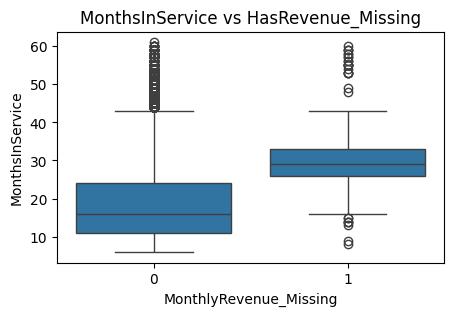

ActiveSubs: t=2.935, p=0.00334


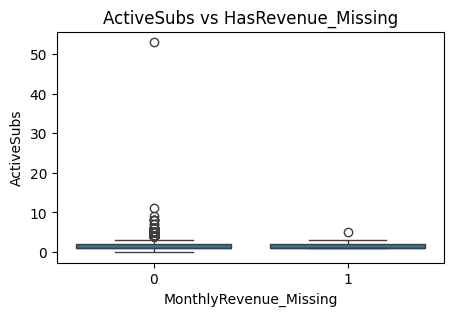

In [36]:
from scipy.stats import ttest_ind

num_features = ['MonthsInService', 'ActiveSubs']

for col in num_features:
    group_missing = df_train.loc[df_train['MonthlyRevenue_Missing'] == 1, col]
    group_nonmissing = df_train.loc[df_train['MonthlyRevenue_Missing'] == 0, col]
    
    # T-test & p-value
    t_stat, p_val = ttest_ind(group_missing, group_nonmissing, nan_policy='omit')
    print(f'{col}: t={t_stat:.3f}, p={p_val:.5f}')
    
    # Boxplot
    plt.figure(figsize=(5,3))
    sns.boxplot(x='MonthlyRevenue_Missing', y=col, data=df_train)
    plt.title(f'{col} vs HasRevenue_Missing')
    plt.show()


In [37]:
df_train.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [38]:
numeric_cols = ['MonthsInService','ActiveSubs','HandsetPrice','UniqueSubs']

interpretation = []

for miss_cols in df_train.columns:
    if df_train[miss_cols].isna().any():
        flag = miss_cols + '_Missing'
        for num_cols in numeric_cols:
            t, p = ttest_ind(
                df_train.loc[df_train[flag] == 1, num_cols],
                df_train.loc[df_train[flag] == 0, num_cols],
                nan_policy = 'omit'
            )
            interpretation.append({'Missing_col': miss_cols, 'Num_col': num_cols, 't': t, 'p': p})

In [39]:
len(df_train.columns)

74